# Introduction


Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>

<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>


# Import Statements


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.


In [2]:
df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")

df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("Daily Bitcoin Price.csv")

df_unemployment = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")

# Data Exploration


### Tesla


**Shape of DataFrames**


In [4]:
df_tesla.shape

(124, 3)

In [5]:
df_btc_search.shape

(73, 2)

In [6]:
df_unemployment.shape

(181, 3)

In [7]:
df_btc_search.shape

(73, 2)

In [8]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [12]:
print(f"Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}")
print(f"Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()} ")

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2 


### Unemployment Data


In [13]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [14]:
print(
    'Largest value for "Unemployemnt Benefits"  '
    f"in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}"
)

Largest value for "Unemployemnt Benefits"  in Web Search: 100


### Bitcoin


In [15]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [16]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [17]:
print(f"largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}")

largest BTC News Search: 100


# Data Cleaning


### Check for Missing Values


**Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?**:


In [19]:
print(f"Missing values for Tesla?:{df_tesla.isna().sum().sum()} ")
print(f"Missing values for U/E?: {df_unemployment.isna().sum().sum()}")
print(f"Missing values for BTC Search?: {df_btc_search.isna().sum().sum()}")

Missing values for Tesla?:0 
Missing values for U/E?: 0
Missing values for BTC Search?: 0


In [20]:
print(f"Missing values for BTC price?: {df_btc_price.isna().sum().sum()}")

Missing values for BTC price?: 2


**Remove any missing values that you found.**:


In [22]:
df_btc_price.dropna(inplace=True)
print(f"Missing values for BTC price?: {df_btc_price.isna().sum().sum()}")

Missing values for BTC price?: 0


### Convert Strings to DateTime Objects


**Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.**:


In [33]:
df_tesla.MONTH = pd.to_datetime(df_tesla["MONTH"])
df_tesla[["MONTH"]].head()

,MONTH
0,2010-06-01
1,2010-07-01
2,2010-08-01
3,2010-09-01
4,2010-10-01


In [34]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment["MONTH"])
df_unemployment[["MONTH"]].head()

,MONTH
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01


In [32]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search["MONTH"])
df_btc_search[["MONTH"]].head()

,MONTH
0,2014-09-01
1,2014-10-01
2,2014-11-01
3,2014-12-01
4,2015-01-01


In [37]:
df_btc_price.DATE = pd.to_datetime(df_btc_price["DATE"])
df_btc_price[["DATE"]].head()

,DATE
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>


In [ ]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

In [42]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation


### Tesla Stock Price v.s. Search Volume


**Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.**


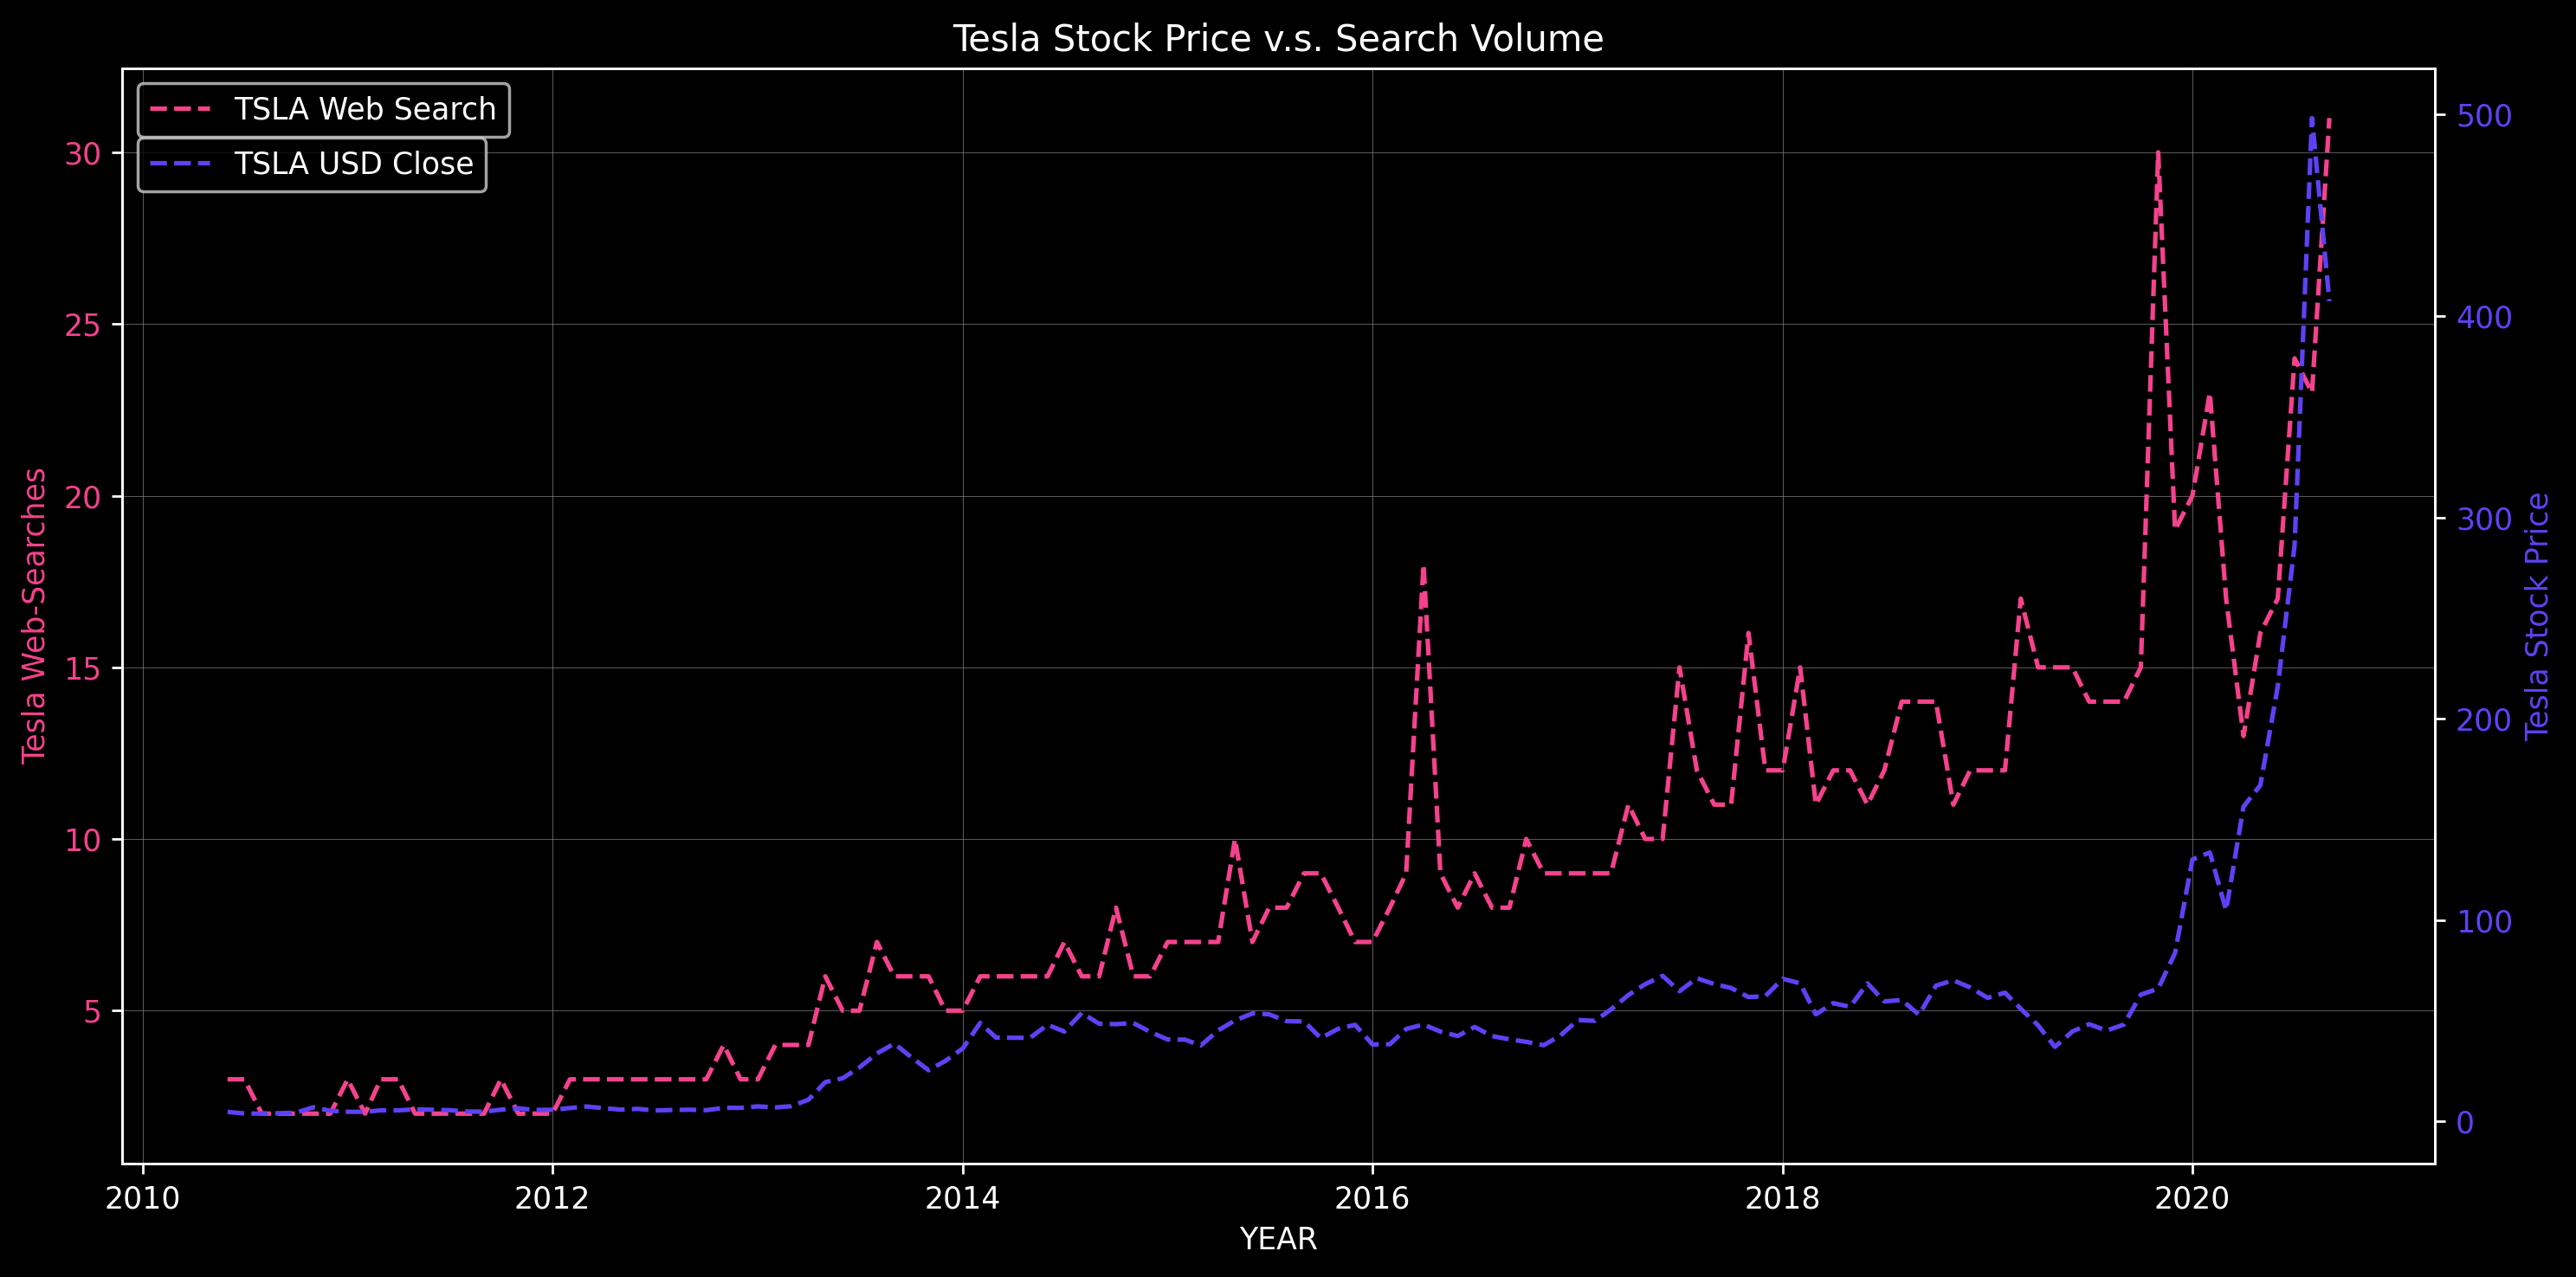

In [69]:
# Defining the Coordinates

X_COR = df_tesla["MONTH"]
Y_COR_1 = df_tesla["TSLA_WEB_SEARCH"]
Y_COR_2 = df_tesla["TSLA_USD_CLOSE"]


# Defining the Frame
fig, axis1 = plt.subplots(figsize=(12, 6), dpi=250)

plt.title("Tesla Stock Price v.s. Search Volume")

axis1 = plt.gca()  # Get Current Axis
axis2 = axis1.twinx()  # Clone the axis

# Plotting Graph1
axis1.plot(
    X_COR,
    Y_COR_1,
    color="#f5428d",
    label="TSLA Web Search",
    linestyle="--",
)

# Plotting Graph2
axis2.plot(
    X_COR,
    Y_COR_2,
    color="#5d42f5",
    label="TSLA USD Close",
    linestyle="--",
)

# Setting Labels
axis1.set_xlabel("YEAR")

axis1.set_ylabel("Tesla Web-Searches", color="#f5428d")
axis2.set_ylabel("Tesla Stock Price", color="#5d42f5")


# Styling Labels
axis1.tick_params(axis="y", labelcolor="#f5428d")
axis2.tick_params(axis="y", labelcolor="#5d42f5")

# Legends
axis1.legend(loc="upper left", bbox_to_anchor=(0, 1))
axis2.legend(loc="upper left", bbox_to_anchor=(0, 0.95))

# Grid:
axis1.grid(True, color="gray", linewidth=0.2)

plt.tight_layout()
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume


In [73]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


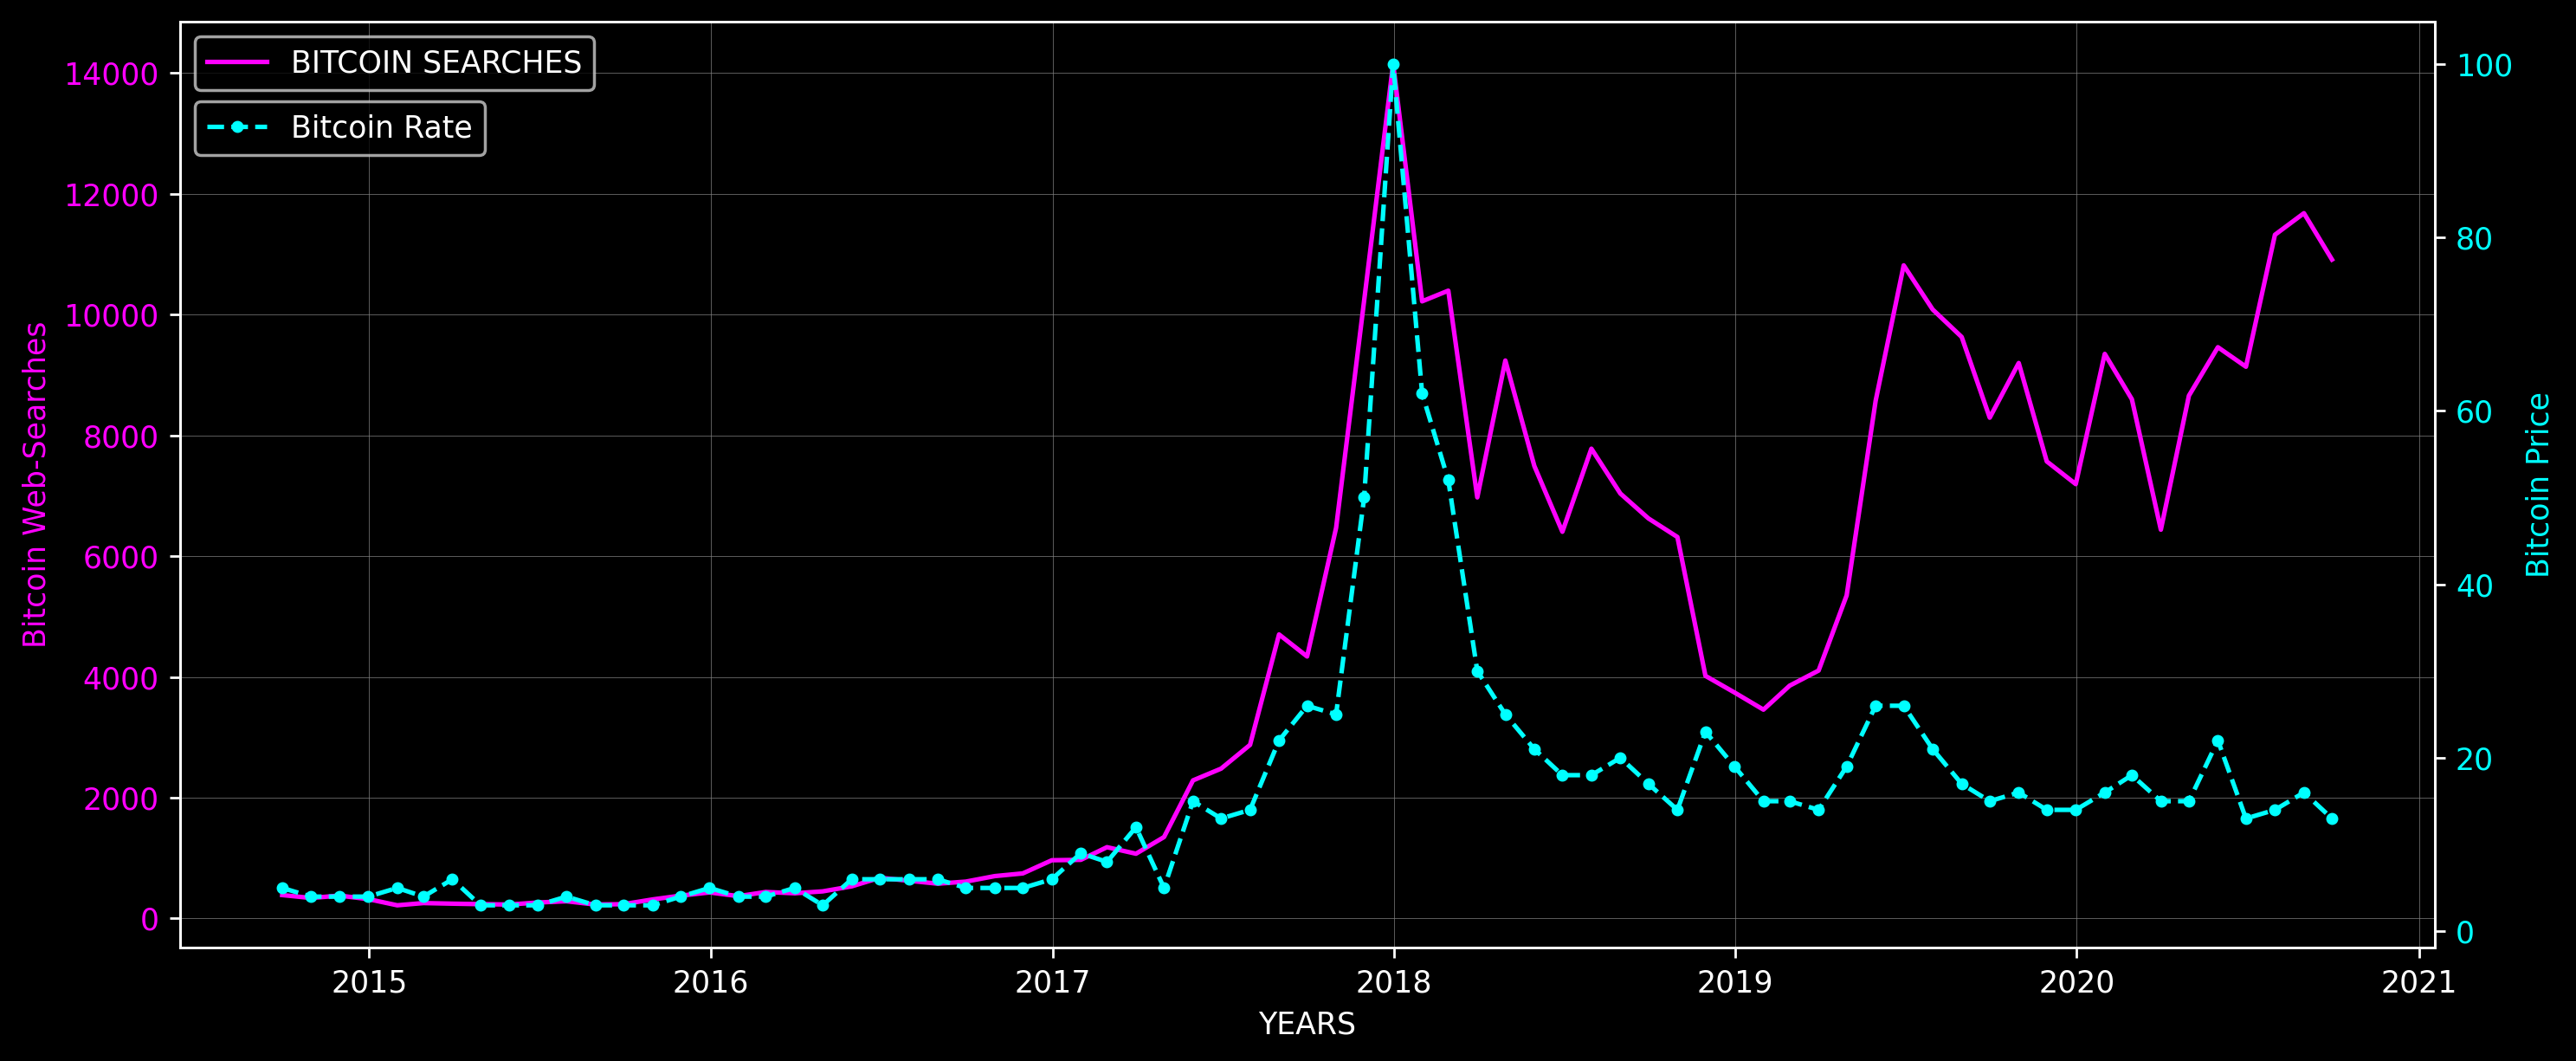

In [91]:
# Defining the Coordinates
X_COR = df_btc_monthly.index
Y_COR_1 = df_btc_monthly["CLOSE"]
Y_COR_2 = df_btc_search["BTC_NEWS_SEARCH"]

fig, axis1 = plt.subplots(figsize=(12, 5), dpi=250)
axis1 = plt.gca()  # Get current axis
axis2 = axis1.twinx()

# Plotting Graph1
axis1.plot(
    X_COR,
    Y_COR_1,
    color="magenta",
    label="BITCOIN SEARCHES",
)

# Plotting Graph2
axis2.plot(
    X_COR,
    Y_COR_2,
    color="cyan",
    label="Bitcoin Rate",
    marker=".",
    linestyle="--",
)


# Setting up labels:
axis1.set_xlabel("YEARS")
axis1.set_ylabel("Bitcoin Web-Searches", color="magenta")
axis2.set_ylabel("Bitcoin Price", color="cyan")

# Styling Label:
axis1.tick_params(axis="y", labelcolor="magenta")
axis2.tick_params(axis="y", labelcolor="cyan")

# Grid:
axis1.grid(True, linewidth=0.2, color="gray")

# Legends:
axis1.legend(loc="upper left", bbox_to_anchor=(0, 1))
axis2.legend(loc="upper left", bbox_to_anchor=(0, 0.93))


plt.tight_layout()
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.


**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.

1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?


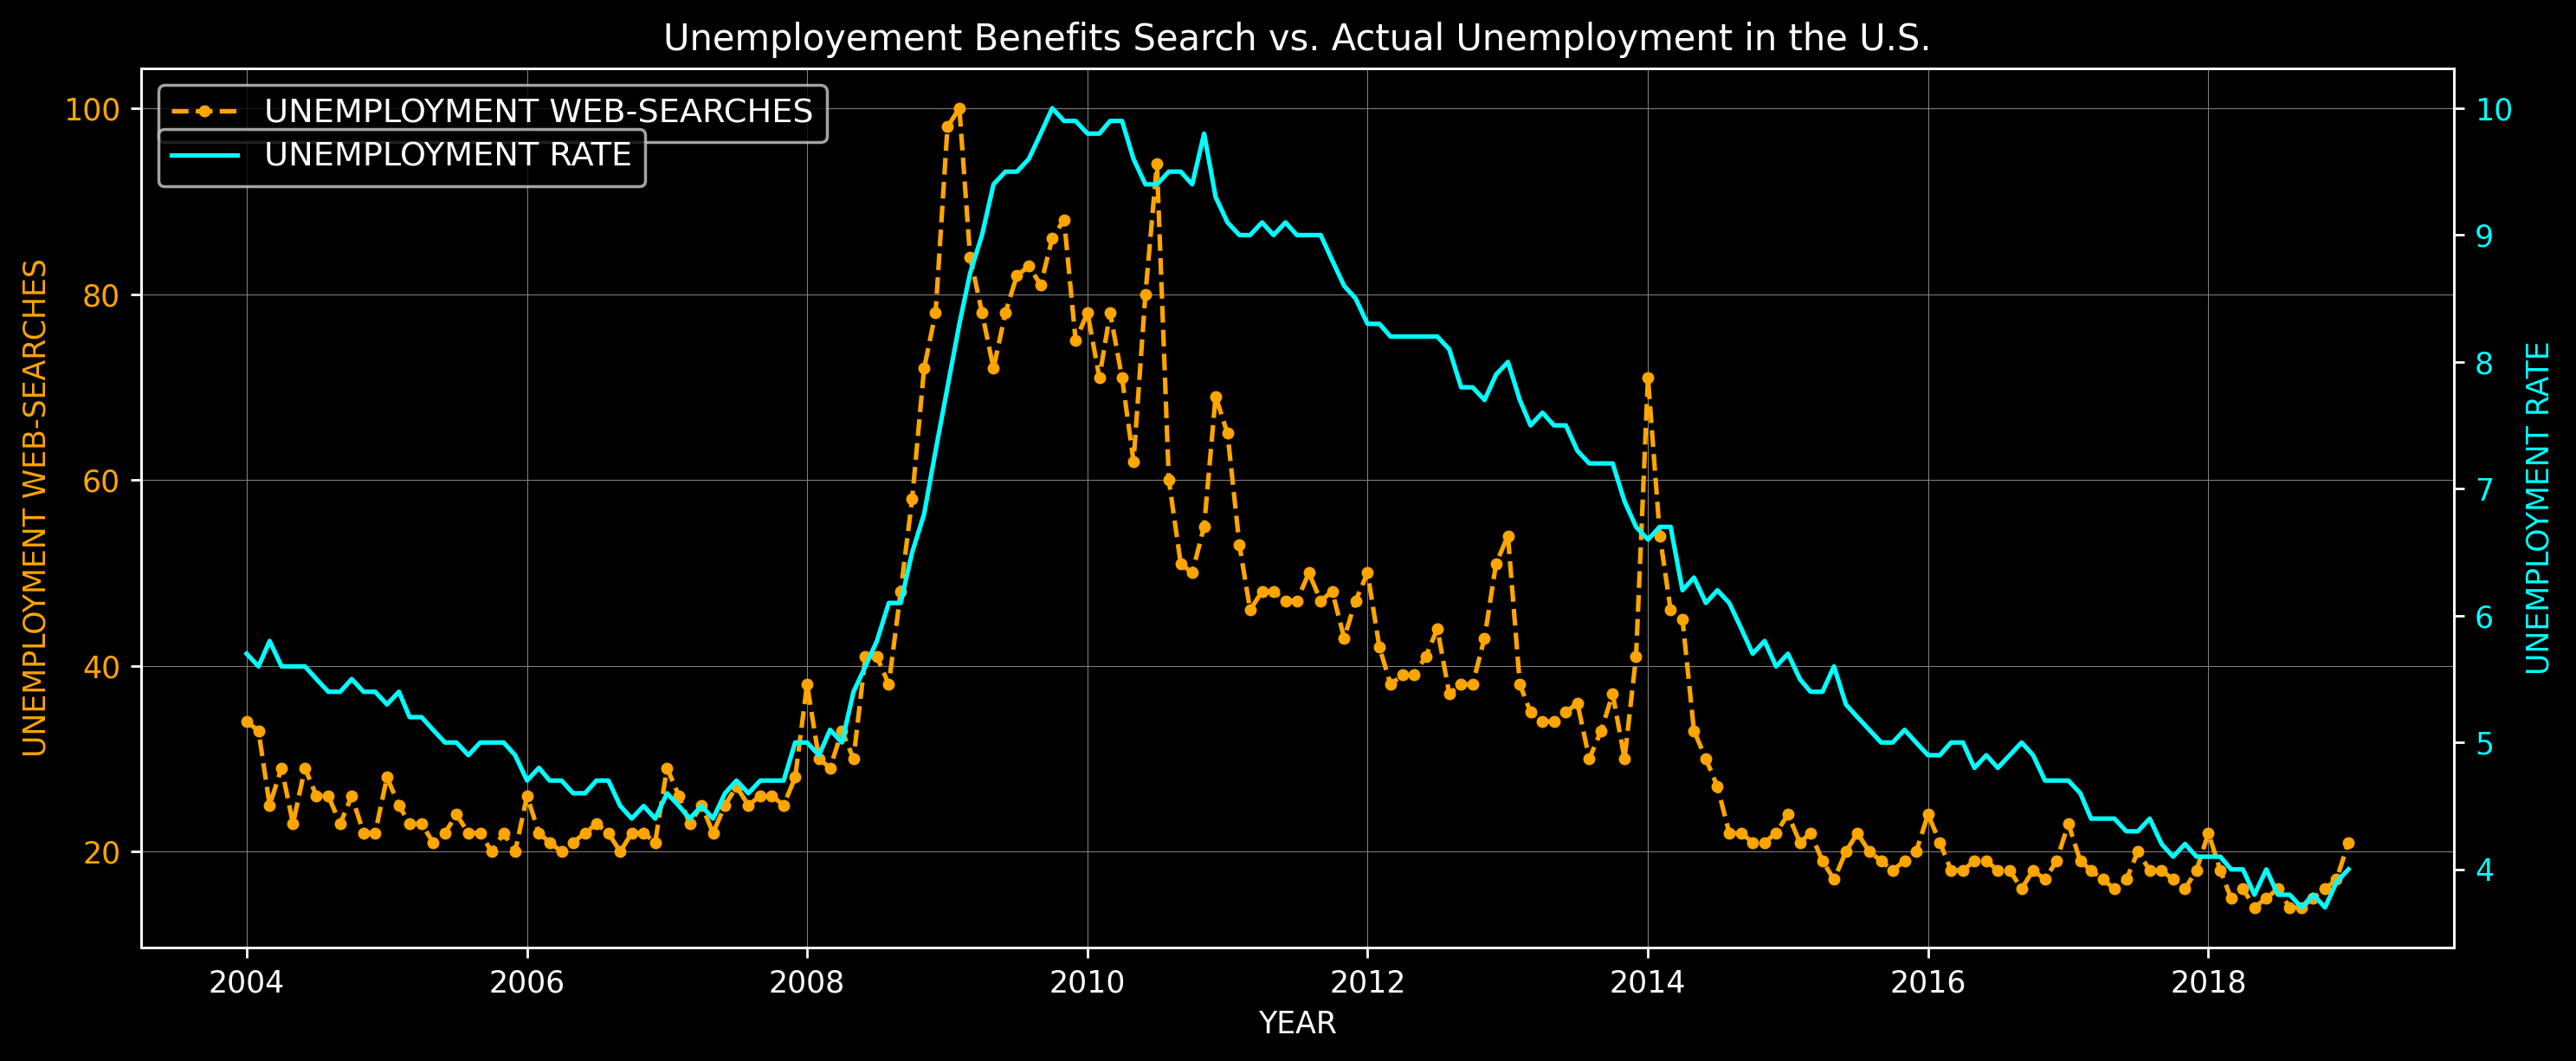

In [114]:
# Setting Coordinates
X_COR = df_unemployment["MONTH"]
Y_COR_1 = df_unemployment["UE_BENEFITS_WEB_SEARCH"]
Y_COR_2 = df_unemployment["UNRATE"]


# Frame Setup:
fig, axis1 = plt.subplots(figsize=(12, 5), dpi=250)
plt.title("Unemployement Benefits Search vs. Actual Unemployment in the U.S.")

axis1 = plt.gca()
axis2 = axis1.twinx()

# Plotting Graph1
axis1.plot(
    X_COR,
    Y_COR_1,
    color="orange",
    label="UNEMPLOYMENT WEB-SEARCHES",
    marker=".",
    linestyle="--",
)

# Plotting Graph2
axis2.plot(
    X_COR,
    Y_COR_2,
    color="cyan",
    label="UNEMPLOYMENT RATE",
)

# Setting Up Labels:
axis1.set_xlabel("YEAR")
axis1.set_ylabel("UNEMPLOYMENT WEB-SEARCHES", color="orange")
axis2.set_ylabel("UNEMPLOYMENT RATE", color="cyan")


# Styling Labels
axis1.tick_params(axis="y", labelcolor="orange")
axis2.tick_params(axis="y", labelcolor="cyan")


# Legend:
axis1.legend(loc="upper left", bbox_to_anchor=(0, 1), fontsize=11)
axis2.legend(loc="upper left", bbox_to_anchor=(0, 0.95), fontsize=11)


# Grid:
axis1.grid(True, color="gray", linewidth=0.3)


plt.tight_layout()
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts


**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?
